##  t-test 연습 1.
데이터 셋: https://www.kaggle.com/datasets/imls/museum-directory

위 데이터 셋은 미국의 박물관, 아쿠아리움, 동물원 등의 위치와 매출 데이터 셋입니다. 동물원의 평균 매출과 그 외 기관들의 평균 매출이 같은지, 다른지 t-test를 이용해 비교해보세요.

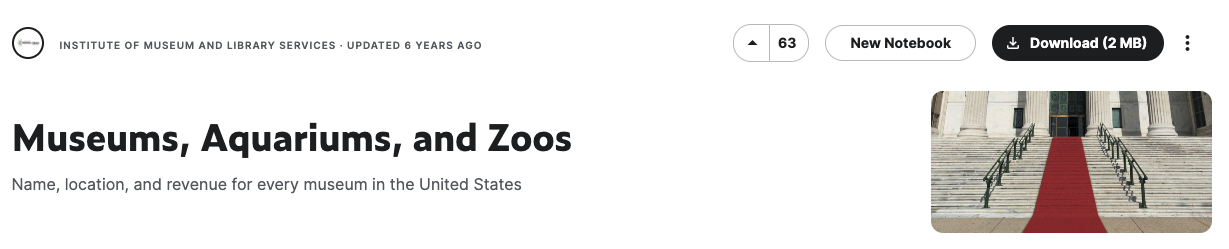

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv("./data/museums.csv")

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_31645/1164956686.py:1: DtypeWarning: Columns (9,14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/museums.csv")


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33072 entries, 0 to 33071
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Museum ID                                 33072 non-null  int64  
 1   Museum Name                               33072 non-null  object 
 2   Legal Name                                33072 non-null  object 
 3   Alternate Name                            1927 non-null   object 
 4   Museum Type                               33072 non-null  object 
 5   Institution Name                          2749 non-null   object 
 6   Street Address (Administrative Location)  33062 non-null  object 
 7   City (Administrative Location)            33072 non-null  object 
 8   State (Administrative Location)           33072 non-null  object 
 9   Zip Code (Administrative Location)        33072 non-null  object 
 10  Street Address (Physical Location)

In [69]:
df = df[["Museum Type", "Revenue"]]

In [70]:
df

,Museum Type,Revenue
0,HISTORY MUSEUM,550236.0
1,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1323742.0
2,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,729080.0
3,HISTORIC PRESERVATION,0.0
4,HISTORY MUSEUM,550236.0
...,...,...
33067,HISTORIC PRESERVATION,NaN
33068,GENERAL MUSEUM,0.0
33069,HISTORIC PRESERVATION,83981.0
33070,HISTORY MUSEUM,0.0


In [73]:
df = df.dropna()

In [76]:
df.isnull().sum()

Museum Type    0
Revenue        0
dtype: int64

In [77]:
df

,Museum Type,Revenue
0,HISTORY MUSEUM,550236.0
1,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1323742.0
2,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,729080.0
3,HISTORIC PRESERVATION,0.0
4,HISTORY MUSEUM,550236.0
...,...,...
33063,ART MUSEUM,43695.0
33068,GENERAL MUSEUM,0.0
33069,HISTORIC PRESERVATION,83981.0
33070,HISTORY MUSEUM,0.0


In [78]:
df["Museum Type"].value_counts()

HISTORIC PRESERVATION                            12382
GENERAL MUSEUM                                    4029
HISTORY MUSEUM                                    2029
ART MUSEUM                                        1844
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER      742
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM         412
CHILDREN'S MUSEUM                                  325
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            292
NATURAL HISTORY MUSEUM                             235
Name: Museum Type, dtype: int64

In [79]:
import re

df["Type"] = df['Museum Type'].apply(lambda x: 'ZOO' if re.search('ZOO', x) else 'OTHERS')

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_31645/3928445323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = df['Museum Type'].apply(lambda x: 'ZOO' if re.search('ZOO', x) else 'OTHERS')


In [82]:
df[df["Type"]=="OTHERS"]

,Museum Type,Revenue,Type
0,HISTORY MUSEUM,550236.0,OTHERS
1,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1323742.0,OTHERS
2,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,729080.0,OTHERS
3,HISTORIC PRESERVATION,0.0,OTHERS
4,HISTORY MUSEUM,550236.0,OTHERS
...,...,...,...
33063,ART MUSEUM,43695.0,OTHERS
33068,GENERAL MUSEUM,0.0,OTHERS
33069,HISTORIC PRESERVATION,83981.0,OTHERS
33070,HISTORY MUSEUM,0.0,OTHERS


<Axes: xlabel='Type', ylabel='Revenue'>

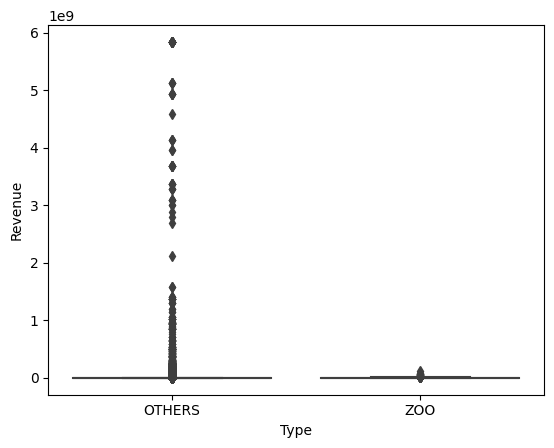

In [83]:
import seaborn as sns

sns.boxplot(
    x="Type",
    y="Revenue",
    data=df
)

In [84]:
df.groupby(["Type"])["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
OTHERS,21998.0,2.118169e+07,2.501520e+08,-2127393.0,0.0,2380.0,161587.0,5.840349e+09
ZOO,292.0,5.483602e+06,1.405838e+07,0.0,0.0,329603.5,2951966.0,1.210595e+08


In [87]:
df[(df["Type"] == "OTHERS") & (df["Revenue"] < 0)]

,Museum Type,Revenue,Type


In [86]:
df = df[df["Revenue"] > 0]

In [88]:
df["log_revenue"] = np.log1p(df["Revenue"])

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_31645/3990593911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_revenue"] = np.log1p(df["Revenue"])


<Axes: xlabel='Type', ylabel='log_revenue'>

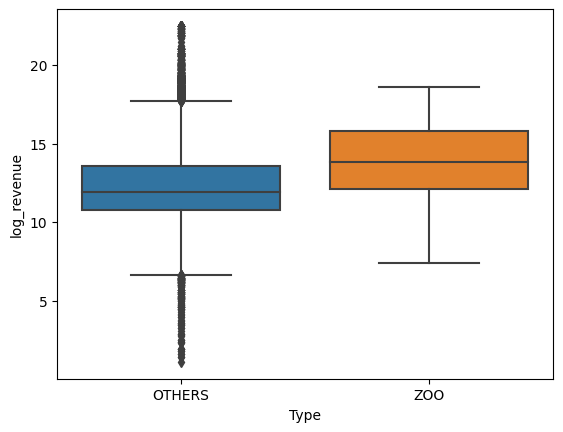

In [90]:
import seaborn as sns

sns.boxplot(
    x="Type",
    y="log_revenue",
    data=df
)

<Axes: xlabel='Type', ylabel='log_revenue'>

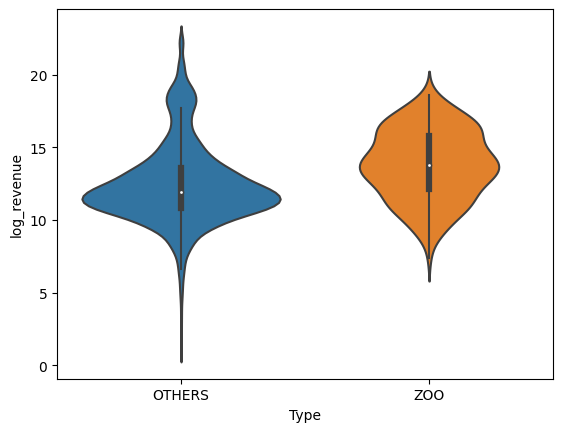

In [91]:
sns.violinplot(
    x="Type",
    y="log_revenue",
    data=df
)

In [92]:
zoo_revenue = df[df["Type"] == "ZOO"]["log_revenue"]
others_revenue = df[df["Type"] == "OTHERS"]["log_revenue"]

In [96]:
from scipy import stats

_, p_value_levene = stats.levene(zoo_revenue, others_revenue)
if p_value_levene > 0.05:
    print(f"p-value: {p_value_levene}, 등분산 가정 만족")
else:
    print(f"p-value: {p_value_levene}, 이분산 가정 만족")

p-value: 0.7408232195041444, 등분산 가정 만족


In [97]:
t_statistic, p_value = stats.ttest_ind(
    a=zoo_revenue,
    b=others_revenue,
    alternative="two-sided",
    equal_var=True
)

In [98]:
t_statistic, p_value

(7.013983937645575, 2.446601914554898e-12)

In [99]:
p_value < 0.05

True